# PSK Modem Constellation Plotter with User-Defined Modulation Order and Phase Offset

This Python script utilizes the `ModulationPy` library to create and display the constellation diagram of a Phase Shift Keying (PSK) modulation scheme. It begins by prompting the user to enter the modulation order `M`, which determines how many distinct phase shifts (or symbols) will be used in the modulation process. The user is also given the option to input a custom phase offset in radians; if no input is provided, the script defaults to using π/4, a commonly used offset that helps improve symbol distinguishability in certain PSK schemes like QPSK. Once the modulation parameters are defined, a `PSKModem` object is created with Gray coding enabled—this ensures that adjacent symbols differ by only one bit, reducing the likelihood of bit errors. The input to the modem is also set to be in binary format. Finally, the script visualizes the resulting PSK constellation using the `plot_const()` method, allowing the user to see the layout of the modulation symbols on the complex plane. This tool is especially helpful for understanding how different modulation orders and phase offsets affect the geometry of PSK signals in digital communication systems.


Enter the modulation order (e.g., 2, 4, 8, 16, 32, 64):  4
Enter phase offset in radians (press Enter for default π/4):  


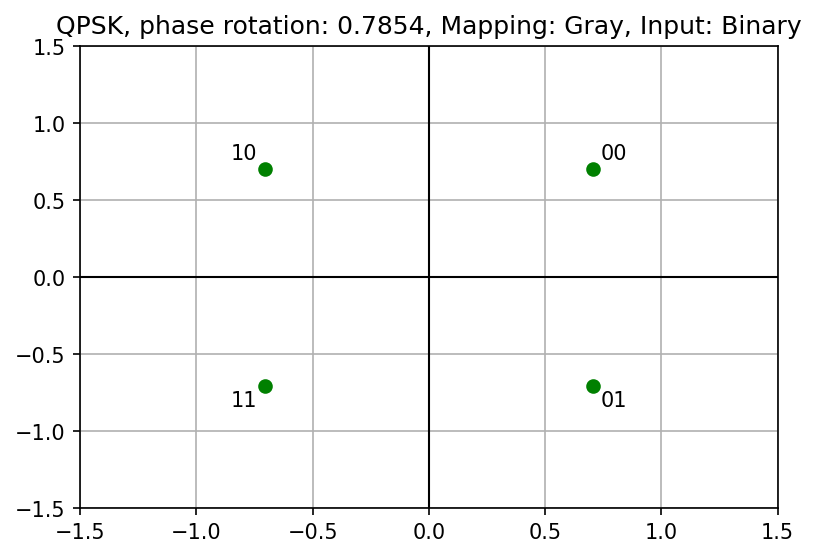

In [31]:
from ModulationPy import PSKModem
import numpy as np

# Ask user for M value
M = int(input("Enter the modulation order (e.g., 2, 4, 8, 16, 32, 64): "))

# Optional: Ask for phase offset
phase_offset = input("Enter phase offset in radians (press Enter for default π/4): ")
phase_offset = float(phase_offset) if phase_offset else np.pi / 4

# Create and plot modem
modem = PSKModem(M, phase_offset, gray_map=True, bin_input=True)
modem.plot_const()


# QAM Modem Constellation Plotter with User-Defined Modulation Order

This script starts by prompting the user to enter a modulation order M (such as 2, 4, 16, or 64), which defines the number of unique symbols in the QAM constellation. A QAMModem object is then created with Gray coding enabled, ensuring that adjacent symbols differ by only one bit to reduce the chance of bit errors. The modem is also configured to accept binary inputs. Finally, the script uses the plot_const() method to generate a graphical representation of the QAM constellation, where symbols are mapped based on both amplitude and phase variations. This visualization helps users understand the structure of QAM and how symbol arrangement changes with different modulation orders, making it useful for educational purposes and communication system analysis.

Enter the modulation order (e.g., 2, 4, 16, 64):  16


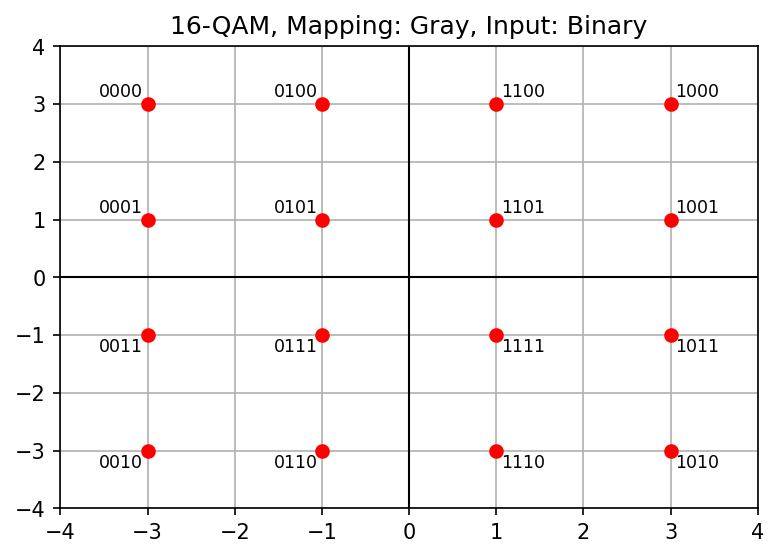

In [37]:
# Ask user for M value
M = int(input("Enter the modulation order (e.g., 2, 4, 16, 64): "))
modem = QAMModem(M,
                 gray_map=True, 
                 bin_input=True)

modem.plot_const()

# Custom Gray-Coded QAM Constellation Generator with User-Defined Amplitudes and Origin

This Python script generates and visualizes a custom Quadrature Amplitude Modulation (QAM) constellation based on user-defined parameters. The user starts by entering the number of bits per symbol (e.g., 4 for 16-QAM), from which the modulation order M and the square grid size of the constellation are calculated. To form the constellation, the user is then asked to provide unique amplitude levels for the first quadrant of the complex plane. These amplitudes are mirrored across both axes to populate all four quadrants, forming the full I/Q constellation grid.

From the set of possible base points in the first quadrant, the user selects a starting symbol point S₀, which determines the Gray labeling's rotational reference. Using this reference point, the script systematically assigns Gray codes to all constellation points by computing the relative position of each symbol in the I (in-phase) and Q (quadrature) axes, then combining their respective Gray-coded bits.

Each symbol is plotted on a 2D plane using matplotlib, annotated with its binary Gray code, and its energy (squared Euclidean distance from the origin) is calculated and printed. The script also calculates and displays the average symbol energy and overlays dashed concentric circles centered at the origin to visually represent equal energy contours. This script is especially useful for learning and teaching how QAM constellations work, how Gray coding reduces bit error rates, and how energy levels vary across symbols in a QAM scheme.

Enter number of bits per symbol (e.g., 4 for 16-QAM):  4



Modulation order M = 16
Constellation grid size: 4 x 4

👉 For this configuration, you need to enter 2 unique amplitude levels for the first quadrant.


Enter 2 increasing I/Q amplitude levels for the first quadrant (comma-separated):  1,3



Base points in the first quadrant:
0: (1.0, 1.0)
1: (1.0, 3.0)
2: (3.0, 1.0)
3: (3.0, 3.0)



Enter the index of the S₀ point (0 to 3):  0



Constellation Points (Gray coded):
1011: (-3.0, 3.0) | Energy: 18.00
1010: (-1.0, 3.0) | Energy: 10.00
1000: (1.0, 3.0) | Energy: 10.00
1001: (3.0, 3.0) | Energy: 18.00
0011: (-3.0, 1.0) | Energy: 10.00
0010: (-1.0, 1.0) | Energy: 2.00
0000: (1.0, 1.0) | Energy: 2.00  <--- S₀
0001: (3.0, 1.0) | Energy: 10.00
0111: (-3.0, -1.0) | Energy: 10.00
0110: (-1.0, -1.0) | Energy: 2.00
0100: (1.0, -1.0) | Energy: 2.00
0101: (3.0, -1.0) | Energy: 10.00
1111: (-3.0, -3.0) | Energy: 18.00
1110: (-1.0, -3.0) | Energy: 10.00
1100: (1.0, -3.0) | Energy: 10.00
1101: (3.0, -3.0) | Energy: 18.00

Average Symbol Energy: 10.00


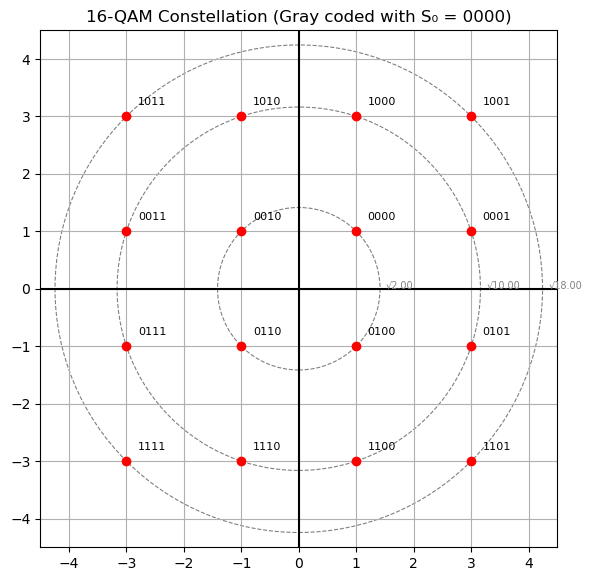

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import math

def gray_code(n):
    return n ^ (n >> 1)

def gray_code_bin(n, bits):
    return format(gray_code(n), f'0{bits}b')

# Step 1: User input
m = int(input("Enter number of bits per symbol (e.g., 4 for 16-QAM): "))
M = 2 ** m
grid_size = int(math.sqrt(M))

print(f"\nModulation order M = {M}")
print(f"Constellation grid size: {grid_size} x {grid_size}")

# Tell user how many amplitude levels to enter
levels_needed = grid_size // 2
print(f"\n👉 For this configuration, you need to enter {levels_needed} unique amplitude levels for the first quadrant.")

# Step 2: Get base point amplitudes for I and Q
amp_input = input(f"Enter {levels_needed} increasing I/Q amplitude levels for the first quadrant (comma-separated): ")
amplitudes = sorted([float(x.strip()) for x in amp_input.split(',')])

if len(amplitudes) != levels_needed:
    raise ValueError(f"You must enter exactly {levels_needed} amplitude levels!")

base_points = list(product(amplitudes, repeat=2))

print("\nBase points in the first quadrant:")
for idx, pt in enumerate(base_points):
    print(f"{idx}: {pt}")

# Step 3: Choose S0 (starting point)
s0_index = int(input(f"\nEnter the index of the S₀ point (0 to {len(base_points)-1}): "))
s0 = base_points[s0_index]

# Build I and Q levels including negative amplitudes
I_base = sorted(amplitudes + [-a for a in amplitudes])
Q_base = sorted(amplitudes + [-a for a in amplitudes])

# Sort and make unique
I_base = sorted(list(set(I_base)))
Q_base = sorted(list(set(Q_base)))

# Generate Gray codes for axis levels
axis_bits = int(m / 2)
I_gray = [gray_code_bin(i, axis_bits) for i in range(len(I_base))]
Q_gray = [gray_code_bin(i, axis_bits) for i in range(len(Q_base))]

# Find index of S₀
s0_i_index = I_base.index(s0[0])
s0_q_index = Q_base[::-1].index(s0[1])  # reversed to match row_idx

# Step 4: Generate full constellation with Gray labeling
print("\nConstellation Points (Gray coded):")

# Dynamically size plot for big constellations
plt.figure(figsize=(grid_size + 2, grid_size + 2))

constellation = []
energy_levels = set()
total_energy = 0

for row_idx, q in enumerate(reversed(Q_base)):
    for col_idx, i in enumerate(I_base):
        bits = Q_gray[(row_idx - s0_q_index) % len(Q_base)] + I_gray[(col_idx - s0_i_index) % len(I_base)]
        point = (i, q)
        energy = i**2 + q**2
        total_energy += energy
        energy_levels.add(round(energy, 2))
        constellation.append((bits, point, energy))
        plt.plot(i, q, 'ro')
        plt.text(i + 0.2, q + 0.2, bits, fontsize=8)
        if (i, q) == s0:
            print(f"{bits}: {point} | Energy: {energy:.2f}  <--- S₀")
        else:
            print(f"{bits}: {point} | Energy: {energy:.2f}")

avg_energy = total_energy / M
print(f"\nAverage Symbol Energy: {avg_energy:.2f}")

# Draw concentric energy level circles
for e in sorted(energy_levels):
    r = math.sqrt(e)
    circle = plt.Circle((0, 0), r, color='gray', fill=False, linestyle='dashed', linewidth=0.8)
    plt.gca().add_patch(circle)
    plt.text(r + 0.1, 0, f"√{e:.2f}", fontsize=7, color='gray')

plt.title(f"{M}-QAM Constellation (Gray coded with S₀ = 0000)")
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim(min(I_base) - 1.5, max(I_base) + 1.5)
plt.ylim(min(Q_base) - 1.5, max(Q_base) + 1.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()


# Comprehensive QAM Symbol Analysis with Gray Coding, Energy, and Phase Representation

After constructing and visualizing the constellation, it iterates through every point in the constellation and computes the phase angle of each symbol relative to the origin. The phase is expressed as a multiple of π using symbolic math with SymPy to ensure clarity and precision.

For each symbol, the script calculates the angle using atan2(q, i), which returns the angle in radians. This angle is then divided by π and simplified with nsimplify to express it in a more readable format like 1/4 π or -3/8 π. If the result is a rational number, it's shown exactly; otherwise, it’s approximated to three decimal places. Alongside the phase, the script prints each symbol’s Gray-coded bit label, its (I, Q) coordinates, and its energy (i² + q²), all neatly formatted in a tabular layout.

This phase table offers insight into the angular placement of each QAM symbol and is particularly useful for analyzing modulation symmetry, phase ambiguity, and for developing demodulation algorithms in communication systems.

In [41]:
from sympy import atan2, pi, nsimplify, Rational

# Pretty tableau with simplified π-based phase
print("\n📋 Tableau de correspondance (Bit label → Point → Energy → Phase):")
print("-" * 90)
print(f"{'Bits':<12} | {'Point (I,Q)':<18} | {'Energy':>8} | {'Phase (π)':>20}")
print("-" * 90)

for bits, (i, q), energy in constellation:
    # Calculate symbolic phase
    phase_expr = atan2(q, i) / pi
    # Simplify the phase to avoid excessive precision
    phase_simplified = nsimplify(phase_expr)
    
    # Ensure negative signs are handled neatly
    if phase_simplified < 0:
        phase_str = f"- {abs(phase_simplified)} π"
    else:
        phase_str = f"{phase_simplified} π"
    
    # Convert to fraction if possible
    if isinstance(phase_simplified, Rational):
        phase_str = f"{phase_simplified} π"
    else:
        # Otherwise, approximate numerically
        phase_str = f"{round(phase_simplified, 3)} π"
    
    print(f"{bits:<12} | {str((i, q)):<18} | {energy:>8.2f} | {phase_str:>12}")



📋 Tableau de correspondance (Bit label → Point → Energy → Phase):
------------------------------------------------------------------------------------------
Bits         | Point (I,Q)        |   Energy |            Phase (π)
------------------------------------------------------------------------------------------
1011         | (-3.0, 3.0)        |    18.00 |        3/4 π
1010         | (-1.0, 3.0)        |    10.00 |      0.602 π
1000         | (1.0, 3.0)         |    10.00 |      0.398 π
1001         | (3.0, 3.0)         |    18.00 |        1/4 π
0011         | (-3.0, 1.0)        |    10.00 |      0.898 π
0010         | (-1.0, 1.0)        |     2.00 |        3/4 π
0000         | (1.0, 1.0)         |     2.00 |        1/4 π
0001         | (3.0, 1.0)         |    10.00 |      0.102 π
0111         | (-3.0, -1.0)       |    10.00 |     -0.898 π
0110         | (-1.0, -1.0)       |     2.00 |       -3/4 π
0100         | (1.0, -1.0)        |     2.00 |       -1/4 π
0101         | (3.0, -1

# Advanced QAM Constellation Statistics and Symbol Classification by Phase and Energy

After building a DataFrame from the constellation data, it calculates the normalized phase of each symbol (as a multiple of π), simplifies it into readable fractional forms, and adds it to the DataFrame.

It then generates detailed summaries of the energy distribution—including total, average, minimum, and maximum energies—and the phase distribution, highlighting the minimum, maximum, and total phase range. Additionally, it identifies the most frequent phase, referred to as the "phase de déclenchement", which might correspond to a reference or dominant orientation in the constellation.

The script also includes groupings:

       -From phase to associated energies and symbol labels, showing how different angular placements relate to power levels and bit patterns.

       -From energy to symbol labels, providing insight into symbol grouping based on identical power levels.

These structured summaries are displayed in neatly formatted tables, offering a powerful and user-friendly diagnostic of the modulation scheme's structure, symmetry, and efficiency.

In [43]:
import pandas as pd
from sympy import atan2, nsimplify, sympify, pi, Rational

# === Build the DataFrame from the constellation ===
df = pd.DataFrame([{
    'Symbole': bits,
    'Point': (i, q),
    'Énergie': energy,
    'Phase_decimal': float(atan2(q, i) / pi),
} for bits, (i, q), energy in constellation])

# === Format phase as nice fractions of π ===
def format_phase(x):
    simplified = nsimplify(x, rational=True)
    if isinstance(simplified, Rational) and abs(simplified.q) <= 10:
        return f"{simplified} π"
    else:
        return f"{round(float(x), 3)} π"

df['Phase (π)'] = df['Phase_decimal'].apply(format_phase)

# === Énergies: Résumé statistique ===
energy_stats = {
    'Énergie totale': df['Énergie'].sum(),
    'Énergie moyenne': df['Énergie'].mean(),
    'Énergie minimale': df['Énergie'].min(),
    'Énergie maximale': df['Énergie'].max()
}

# === Phases: Résumé statistique ===
min_phase = df['Phase_decimal'].min()
max_phase = df['Phase_decimal'].max()
phase_range = max_phase - min_phase

phase_stats = {
    'Phase minimale (π)': f"{min_phase:.2f}",
    'Phase maximale (π)': f"{max_phase:.2f}",
    'Écart de phase (π)': f"{phase_range:.2f}"
}

# === Résumé global ===
print("\n📊 BILAN DES ÉNERGIES")
display(pd.DataFrame(energy_stats, index=['Valeurs']))

print("\n📈 BILAN DES PHASES")
display(pd.DataFrame(phase_stats, index=['Valeurs']))

# === Phase de déclenchement (la plus fréquente) ===
phase_counts = df['Phase (π)'].value_counts().reset_index()
phase_counts.columns = ['Phase (π)', 'Nombre de Symboles']
most_used = phase_counts.iloc[0]

print("\n🔔 PHASE DE DÉCLENCHEMENT")
display(pd.DataFrame([most_used]))

# === Groupement Phase → Énergies + Symboles ===
grouped_phase = df.groupby('Phase (π)').agg(
    Énergies=('Énergie', lambda x: sorted(set(x))),
    Symboles=('Symbole', lambda x: sorted(x))
).reset_index()

print("\n🌀 PHASE → ÉNERGIES + SYMBOLES")
display(grouped_phase)

# === Groupement Énergie → Symboles ===
grouped_energy = df.groupby('Énergie').agg(
    Symboles=('Symbole', lambda x: sorted(x))
).reset_index()

print("\n⚡ ÉNERGIE → SYMBOLES")
display(grouped_energy)



📊 BILAN DES ÉNERGIES


,Énergie totale,Énergie moyenne,Énergie minimale,Énergie maximale
Valeurs,160.0,10.0,2.0,18.0



📈 BILAN DES PHASES


,Phase minimale (π),Phase maximale (π),Écart de phase (π)
Valeurs,-0.90,0.90,1.80



🔔 PHASE DE DÉCLENCHEMENT


,Phase (π),Nombre de Symboles
0,3/4 π,2



🌀 PHASE → ÉNERGIES + SYMBOLES


,Phase (π),Énergies,Symboles
0,-0.102 π,[10.0],[0101]
1,-0.398 π,[10.0],[1100]
2,-0.602 π,[10.0],[1110]
3,-0.898 π,[10.0],[0111]
4,-1/4 π,"[2.0, 18.0]","[0100, 1101]"
5,-3/4 π,"[2.0, 18.0]","[0110, 1111]"
6,0.102 π,[10.0],[0001]
7,0.398 π,[10.0],[1000]
8,0.602 π,[10.0],[1010]
9,0.898 π,[10.0],[0011]



⚡ ÉNERGIE → SYMBOLES


,Énergie,Symboles
0,2.0,"[0000, 0010, 0100, 0110]"
1,10.0,"[0001, 0011, 0101, 0111, 1000, 1010, 1100, 1110]"
2,18.0,"[1001, 1011, 1101, 1111]"


In [7]:
print(constellation[0])

('1011', (-3.0, 3.0), 18.0)


# Simulating AWGN and Phase Noise Effects on QAM Constellation Reception

This code simulates the effects of Additive White Gaussian Noise (AWGN) and phase noise on a QAM constellation and visualizes the impact on received symbols. It begins by prompting the user to choose the type of noise to add—AWGN only, phase noise only, or both—and to specify the Signal-to-Noise Ratio (SNR) in dB and the number of received samples per symbol. The clean (transmitted) constellation points are extracted from a previously defined constellation.

AWGN is added by generating random noise with zero mean and a variance determined by the specified SNR and average symbol energy. Phase noise is simulated by perturbing each point’s phase angle with a small Gaussian-distributed shift, preserving the magnitude but altering the angle. When both noise types are selected, AWGN is added first, followed by phase noise to simulate combined distortion.

The resulting noisy received symbols (RX points) are plotted alongside the original clean constellation (TX points). The red points represent noisy received samples, while blue points represent the original symbols. This visualization clearly shows how noise spreads the constellation points around their ideal locations, helping users understand the impact of channel impairments on demodulation accuracy.


🎛️ Type de bruit à ajouter:
1: AWGN uniquement
2: Bruit de phase uniquement
3: AWGN + Bruit de phase


➡️ Choisissez (1/2/3):  2
🔁 Combien de points RX par symbole ? (ex: 10):  1000


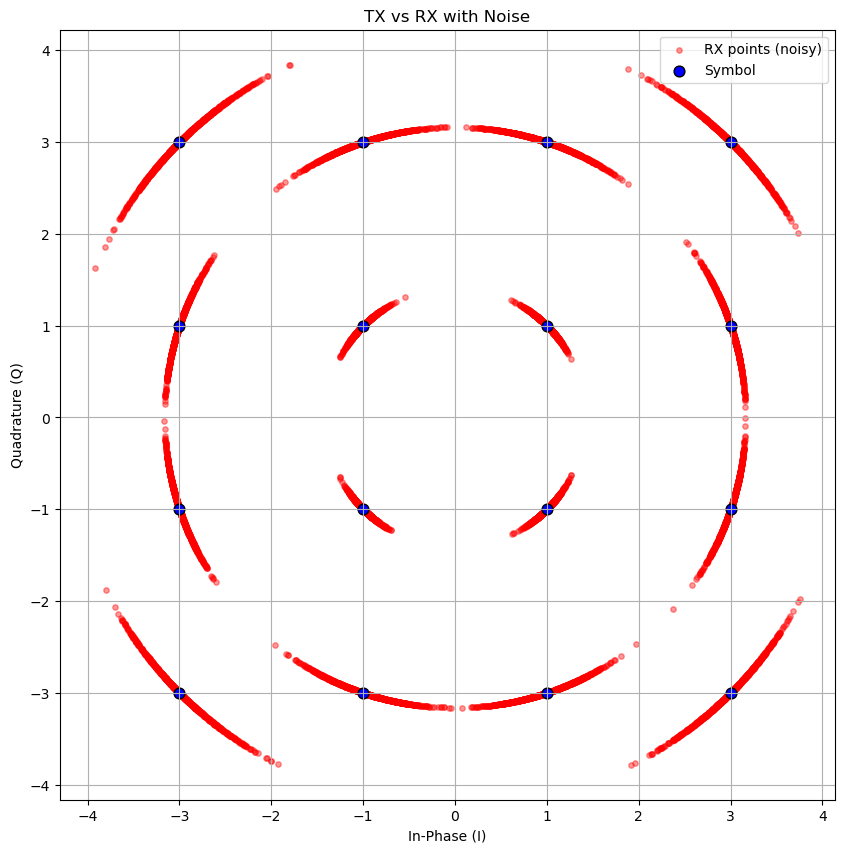

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def add_awgn_noise(points, snr_db, num_samples=1):
    snr_linear = 10 ** (snr_db / 10)
    avg_energy = np.mean([i**2 + q**2 for i, q in points])
    noise_variance = avg_energy / (2 * snr_linear)
    noisy_points = []

    for i, q in points:
        for _ in range(num_samples):
            n_i, n_q = np.random.normal(0, np.sqrt(noise_variance), 2)
            noisy_points.append((i + n_i, q + n_q))
    
    return noisy_points

def add_phase_noise(points, std_dev_rad):
    noisy_points = []
    for i, q in points:
        r = np.sqrt(i**2 + q**2)
        original_phase = np.angle(complex(i, q))
        noise = np.random.normal(0, std_dev_rad)
        new_phase = original_phase + noise
        noisy_i = r * np.cos(new_phase)
        noisy_q = r * np.sin(new_phase)
        noisy_points.append((noisy_i, noisy_q))
    return noisy_points


# === ASK USER ===
print("\n🎛️ Type de bruit à ajouter:")
print("1: AWGN uniquement")
print("2: Bruit de phase uniquement")
print("3: AWGN + Bruit de phase")
noise_type = input("➡️ Choisissez (1/2/3): ").strip()

snr_input = 0
if noise_type in ['1', '3']:
    snr_input = float(input("\n💡 Entrez le SNR en dB (ex: 20): "))

num_samples = int(input("🔁 Combien de points RX par symbole ? (ex: 10): "))

# === EXTRACT CONSTELLATION POINTS ===
tx_points = [item[1] for item in constellation]

# === ADD NOISE ===
rx_points = tx_points

if noise_type == '1':
    rx_points = add_awgn_noise(tx_points, snr_input, num_samples=num_samples)

elif noise_type == '2':
    rx_points = add_phase_noise(tx_points * num_samples, std_dev_rad=0.1)

elif noise_type == '3':
    rx_points = add_awgn_noise(tx_points, snr_input, num_samples=num_samples)
    rx_points = add_phase_noise(rx_points, std_dev_rad=0.1)

# === PLOT RX vs TX ===
plt.figure(figsize=(10, 10))
tx_i, tx_q = zip(*tx_points)
rx_i, rx_q = zip(*rx_points)

# 🟥 Plot RX points first (background)
plt.scatter(rx_i, rx_q, color='red', alpha=0.4, s=15, label='RX points (noisy)')

# 🔵 Then TX points (foreground)
plt.scatter(tx_i, tx_q, color='blue', edgecolor='black', s=60, label='Symbol')
plt.title("TX vs RX with Noise")
plt.xlabel("In-Phase (I)")
plt.ylabel("Quadrature (Q)")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()


# Bit Error Rate (BER) Estimation for Noisy QAM Reception 

This code estimates the Bit Error Rate (BER) in a QAM communication system by comparing received noisy symbols with their closest original (transmitted) counterparts. The function get_nearest_symbol() calculates the Euclidean distance between each received point and all original constellation points, selecting the one with the smallest distance (nearest-neighbor decision rule).

To align with the multiple noisy samples generated per symbol, the original bit labels are repeated using np.repeat(). Then, for each received point, the closest original symbol is found, and its bit label is treated as the detected bits.

The BER is computed by counting mismatches between the transmitted and detected bits across all received samples. Finally, the BER is printed as a decimal, offering a quantitative measure of how well the modulation scheme withstands noise at the given SNR. This is a critical metric in evaluating the performance of digital communication systems.

In [49]:
def get_nearest_symbol(rx_point, tx_points):
    """Return index of the closest constellation point"""
    distances = [np.linalg.norm(np.array(rx_point) - np.array(tx)) for tx in tx_points]
    return np.argmin(distances)

# Repeat TX bits to match RX samples
tx_bits = [entry[0] for entry in constellation]  # original bits
tx_bits_repeated = np.repeat(tx_bits, num_samples)

rx_detected_bits = []

for rx in rx_points:
    nearest_idx = get_nearest_symbol(rx, tx_points)
    detected_bits = tx_bits[nearest_idx]
    rx_detected_bits.append(detected_bits)

# Compare bits
total_bits = len(rx_detected_bits) * m
bit_errors = sum(
    sum(tb != rb for tb, rb in zip(tx_bit, rx_bit))
    for tx_bit, rx_bit in zip(tx_bits_repeated, rx_detected_bits)
)

ber = bit_errors / total_bits
print(f"\n📉 Bit Error Rate (BER): {ber:.6f} at SNR = {snr_input} dB")



📉 Bit Error Rate (BER): 0.001094 at SNR = 20.0 dB


# BER vs SNR Simulation

This function simulate_ber_vs_snr performs a comprehensive Bit Error Rate (BER) simulation over a range of Signal-to-Noise Ratios (SNR) for a given QAM constellation affected by specified noise types (AWGN, phase noise, or both). For each SNR value in the range, the function generates noisy received points by adding the appropriate noise, then detects the closest transmitted symbol for each received point using nearest-neighbor detection.

It compares detected bits against transmitted bits to calculate the total bit errors and derives the BER. This BER is stored and printed for every SNR level, providing a performance profile of the modulation scheme across noise intensities.

Finally, the BER values are plotted on a semi-log scale versus SNR in dB, visually demonstrating how increasing SNR improves detection accuracy by lowering the BER. This simulation helps analyze the robustness of the custom constellation and noise impact on system reliability.

SNR = 0 dB → BER = 0.288359
SNR = 2 dB → BER = 0.239250
SNR = 4 dB → BER = 0.190406
SNR = 6 dB → BER = 0.148609
SNR = 8 dB → BER = 0.103938
SNR = 10 dB → BER = 0.066000
SNR = 12 dB → BER = 0.036969
SNR = 14 dB → BER = 0.017422
SNR = 16 dB → BER = 0.007500
SNR = 18 dB → BER = 0.003453
SNR = 20 dB → BER = 0.001687


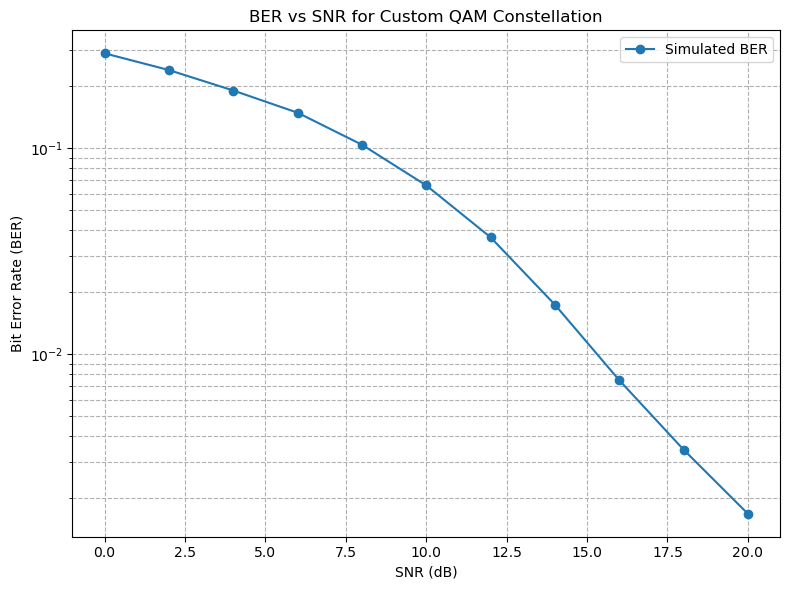

In [10]:
def simulate_ber_vs_snr(snr_range_db, num_samples, noise_type):
    tx_points = [item[1] for item in constellation]
    tx_bits = [item[0] for item in constellation]

    ber_results = []

    for snr_db in snr_range_db:
        if noise_type == '1':
            rx_points = add_awgn_noise(tx_points, snr_db, num_samples=num_samples)
        elif noise_type == '2':
            rx_points = add_phase_noise(tx_points * num_samples, std_dev_rad=0.1)
        elif noise_type == '3':
            rx_points = add_awgn_noise(tx_points, snr_db, num_samples=num_samples)
            rx_points = add_phase_noise(rx_points, std_dev_rad=0.1)

        # Repeat bits to match number of RX points
        tx_bits_repeated = np.repeat(tx_bits, num_samples)
        rx_detected_bits = []

        for rx in rx_points:
            nearest_idx = get_nearest_symbol(rx, tx_points)
            rx_detected_bits.append(tx_bits[nearest_idx])

        # Bit error count
        total_bits = len(rx_detected_bits) * m
        bit_errors = sum(
            sum(tb != rb for tb, rb in zip(tx_bit, rx_bit))
            for tx_bit, rx_bit in zip(tx_bits_repeated, rx_detected_bits)
        )
        ber = bit_errors / total_bits
        ber_results.append(ber)
        print(f"SNR = {snr_db} dB → BER = {ber:.6f}")

    return ber_results


# === Run BER Simulation ===
snr_range_db = list(range(0, 21, 2))  # SNR from 0 to 20 dB in steps of 2
ber_values = simulate_ber_vs_snr(snr_range_db, num_samples=num_samples, noise_type=noise_type)

# === Plot BER vs SNR ===
plt.figure(figsize=(8, 6))
plt.semilogy(snr_range_db, ber_values, marker='o', label='Simulated BER')
plt.grid(True, which='both', linestyle='--')
plt.xlabel("SNR (dB)")
plt.ylabel("Bit Error Rate (BER)")
plt.title("BER vs SNR for Custom QAM Constellation")
plt.legend()
plt.tight_layout()
plt.show()


# Image Transmission Simulation over QAM with Noise and Bit Error Analysis

This code begins by loading and resizing the input image, converting its pixel values into a bitstream. The bitstream is segmented into symbols based on the modulation order and mapped to constellation points.

Noise, either AWGN, phase noise, or both, is then applied to simulate channel impairments. The received noisy symbols are demapped back to bits by finding the closest constellation point, reconstructing the bitstream. A bit error rate (BER) is calculated by comparing the transmitted and received bitstreams to quantify the degradation caused by noise.

Finally, the recovered bitstream is reshaped into an image format and displayed alongside the original image. This visual comparison, combined with the BER, provides insight into the effectiveness of the modulation scheme and the impact of noise on image fidelity during transmission.


🧮 Nombre d'erreurs de bits : 133
📉 Taux d'erreur binaire (BER): 0.000338


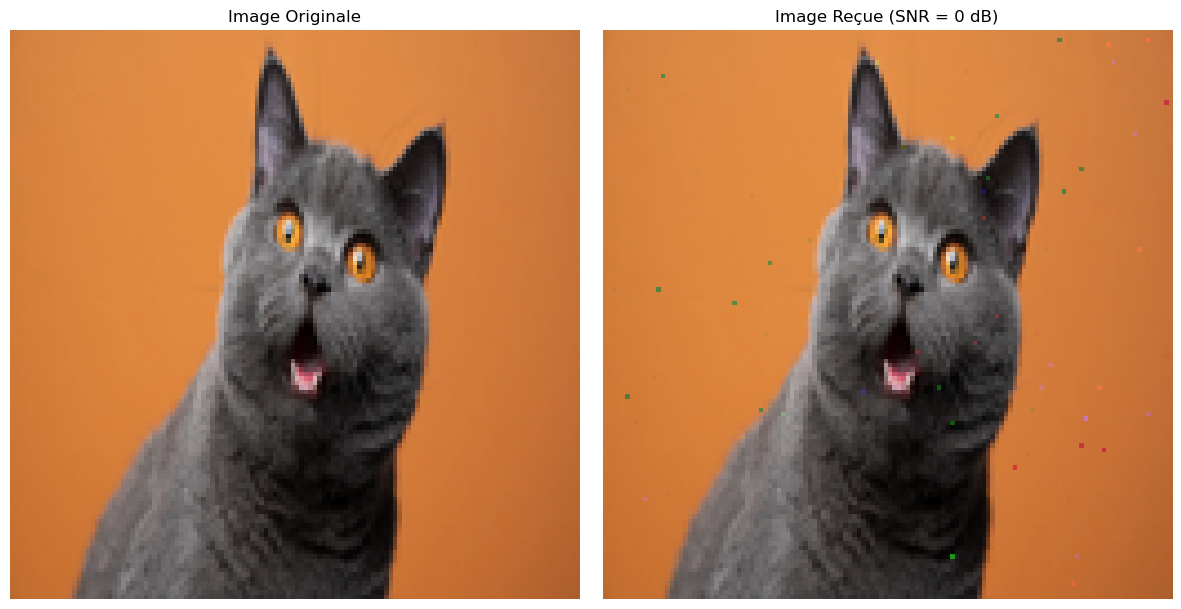

In [59]:
from PIL import Image

# Load and resize image for simplicity (you can skip resizing if you want full quality)
img = Image.open("Cat.webp").convert('RGB')  
img = img.resize((128, 128))
img_np = np.array(img)


# Flatten image and convert pixels (0-255) to bits
img_flat = img_np.flatten()
img_bits = ''.join(format(pixel, '08b') for pixel in img_flat)


# Build bit-to-symbol dictionary from your constellation
bit_to_symbol = {entry[0]: entry[1] for entry in constellation}
symbol_to_bit = {entry[1]: entry[0] for entry in constellation}
bit_symbols = list(bit_to_symbol.keys())

# Pad bits so total is divisible by m
pad_len = (m - len(img_bits) % m) % m
img_bits_padded = img_bits + '0' * pad_len

# Group bits into symbols
symbols_tx = [bit_to_symbol[img_bits_padded[i:i + m]] for i in range(0, len(img_bits_padded), m)]


if noise_type == '1':
    symbols_rx = add_awgn_noise(symbols_tx, snr_input, num_samples=1)
elif noise_type == '2':
    symbols_rx = add_phase_noise(symbols_tx, std_dev_rad=0.1)
elif noise_type == '3':
    noisy = add_awgn_noise(symbols_tx, snr_input, num_samples=1)
    symbols_rx = add_phase_noise(noisy, std_dev_rad=0.1)


rx_bits = []

for rx in symbols_rx:
    nearest_idx = get_nearest_symbol(rx, tx_points)
    rx_bits.append(tx_bits[nearest_idx])

# Rebuild binary string
recovered_bitstream = ''.join(rx_bits)
recovered_bitstream = recovered_bitstream[:len(img_bits)]  # Remove padding

# === BER Calculation ===
num_errors = sum(b1 != b2 for b1, b2 in zip(img_bits, recovered_bitstream))
ber = num_errors / len(img_bits)

print(f"\n🧮 Nombre d'erreurs de bits : {num_errors}")
print(f"📉 Taux d'erreur binaire (BER): {ber:.6f}")



# Convert bits back to integers (pixels)
pixels_rx = [int(recovered_bitstream[i:i+8], 2) for i in range(0, len(recovered_bitstream), 8)]
img_rx = np.array(pixels_rx, dtype=np.uint8).reshape(img_np.shape)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_np, cmap='gray')
plt.title("Image Originale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_rx, cmap='gray')
plt.title(f"Image Reçue (SNR = {snr_input} dB)")
plt.axis('off')
plt.tight_layout()
plt.show()


